In [18]:
import matplotlib.pyplot as plt 
import geopandas as gpd 
import contextily as ctx

# enable latex plotting 
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [19]:
ntas_nyc = gpd.read_file('/share/ju/sidewalk_utils/data/nyc/geo/nta-nyc-2020.geojson')

In [20]:
ct_nyc = gpd.read_file('/share/ju/sidewalk_utils/data/nyc/geo/ct-nyc-2020.geojson')

In [21]:
tracts_to_pull = [['Manhattan', '119'], ['Brooklyn', '133'], ['Bronx', '319'], ['Queens', '25']]

In [22]:
ct_nyc = ct_nyc.set_index(['BoroName', 'CTLabel'])

In [23]:
ct_nyc = ct_nyc[ct_nyc.index.isin(tracts_to_pull)].reset_index()
ct_nyc = ct_nyc.to_crs(epsg=2263)

In [24]:
ct_nyc 

BoroName CTLabel  OBJECTID BoroCode  CT2020 BoroCT2020 CDEligibil  \
0  Manhattan     119        65        1  011900    1011900          I   
1      Bronx     319       256        2  031900    2031900          I   
2     Queens      25       978        4  002500    4002500          E   
3   Brooklyn     133      1152        3  013300    3013300          I   

                               NTAName NTA2020 CDTA2020  \
0                 Midtown-Times Square  MN0502     MN05   
1             Riverdale-Spuyten Duyvil  BX0803     BX08   
2  Queensbridge-Ravenswood-Dutch Kills  QN0105     QN01   
3                           Park Slope  BK0602     BK06   

                                            CDTANAME        GEOID  PUMA  \
0  MN05 Midtown-Flatiron-Union Square (CD 5 Appro...  36061011900  4165   
1  BX08 Riverdale-Kingsbridge-Marble Hill (CD 8 A...  36005031900  4208   
2        QN01 Astoria-Queensbridge (CD 1 Equivalent)  36081002500  4401   
3  BK06 Park Slope-Carroll Gardens (CD 6 Approxim...  36047013300  4306   

    Shape__Area  Shape__Length  \
0  1.911311e+06    5722.090729   
1  2.381338e+06    7159.278771   
2  2.266376e+06    6052.472174   
3  1.596011e+06    5175.703511   

                                            geometry  
0  POLYGON ((989165.562 215217.062, 989039.063 21...  
1  POLYGON ((1011210.057 271912.031, 1011174 2717...  
2  POLYGON ((1000529.451 214437.666, 1000199.585 ...  
3  POLYGON ((990363.108 185360.627, 990243.8 1851...

In [25]:
sidewalks_space_nyc = gpd.read_parquet('/share/ju/sidewalk_utils/data/nyc/claustrophobia/nyc_sidewalks_space.parquet')

In [26]:
ntas_nyc = ntas_nyc.set_index('ntaname')

In [27]:
ntas_nyc 

shape_area  \
ntaname                                      
Greenpoint                   35321204.8204   
Williamsburg                  28854314.555   
South Williamsburg             15208960.44   
East Williamsburg            52266209.4439   
Brooklyn Heights             9982321.73877   
...                                    ...   
Freshkills Park (South)      47758769.3177   
Fort Wadsworth               9867248.21433   
Hoffman & Swinburne Islands  635701.977354   
Miller Field                 10866804.3761   
Great Kills Park             23377916.5113   

                                                                      cdtaname  \
ntaname                                                                          
Greenpoint                      BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
Williamsburg                    BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
South Williamsburg              BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
East Williamsburg               BK01 Williamsburg-Greenpoint (CD 1 Equivalent)   
Brooklyn Heights             BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...   
...                                                                        ...   
Freshkills Park (South)                  SI03 South Shore (CD 3 Approximation)   
Fort Wadsworth               SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   
Hoffman & Swinburne Islands  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   
Miller Field                 SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   
Great Kills Park             SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   

                                shape_leng       boroname ntatype nta2020  \
ntaname                                                                     
Greenpoint                   28912.5653122       Brooklyn       0  BK0101   
Williamsburg                 28098.0267744       Brooklyn       0  BK0102   
South Williamsburg           18250.2804159       Brooklyn       0  BK0103   
East Williamsburg             43184.773814       Brooklyn       0  BK0104   
Brooklyn Heights              14312.506134       Brooklyn       0  BK0201   
...                                    ...            ...     ...     ...   
Freshkills Park (South)      33945.4194651  Staten Island       9  SI0391   
Fort Wadsworth                14814.413643  Staten Island       6  SI9561   
Hoffman & Swinburne Islands   4743.1280043  Staten Island       9  SI9591   
Miller Field                 19197.2009708  Staten Island       9  SI9592   
Great Kills Park             41763.1645788  Staten Island       9  SI9593   

                            borocode countyfips   ntaabbrev cdta2020  \
ntaname                                                                
Greenpoint                         3        047       Grnpt     BK01   
Williamsburg                       3        047    Wllmsbrg     BK01   
South Williamsburg                 3        047   SWllmsbrg     BK01   
East Williamsburg                  3        047   EWllmsbrg     BK01   
Brooklyn Heights                   3        047       BkHts     BK02   
...                              ...        ...         ...      ...   
Freshkills Park (South)            5        085  FrshklPK_S     SI03   
Fort Wadsworth                     5        085   FtWdswrth     SI95   
Hoffman & Swinburne Islands        5        085    HffmnIsl     SI95   
Miller Field                       5        085     MllrFld     SI95   
Great Kills Park                   5        085    GrtKlsPk     SI95   

                                                                      geometry  
ntaname                                                                         
Greenpoint                   MULTIPOLYGON (((-73.93213 40.72816, -73.93238 ...  
Williamsburg                 MULTIPOLYGON (((-73.95814 40.7244, -73.95772 4...  
South Williamsburg           MULTIPOLYGON (((-73.95024 40.70547, -73.94984 ...  
East Williamsburg     

In [28]:
# select neighborhoods to plot 
ntas_nyc = ntas_nyc.loc[['Prospect Heights', 'Fordham Heights', 'North Corona','Midtown South-Flatiron-Union Square']]
ntas_nyc = ntas_nyc.to_crs(epsg=2263)

In [29]:
# create crops of the sidewalks space data for each neighborhood, using spatial joins 
nta_sidewalk_crops = [] 
for nta in ntas_nyc.index:
    nta_geom = ntas_nyc.loc[nta].geometry
    sidewalks_crop = sidewalks_space_nyc[sidewalks_space_nyc.intersects(nta_geom)]
    sidewalks_crop['nta'] = nta
    nta_sidewalk_crops.append(sidewalks_crop)




/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [30]:
# create crops of the sidewalks space data for each tract, using spatial joins 
tract_sidewalk_crops = [] 
for tract in ct_nyc.index:
    ct_geom = ct_nyc.loc[tract].geometry
    sidewalks_crop = sidewalks_space_nyc[sidewalks_space_nyc.intersects(ct_geom)]
    sidewalks_crop['tract'] = tract
    tract_sidewalk_crops.append(sidewalks_crop)




/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/share/ju/matt/conda/rapids-25.02/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [31]:
import matplotlib.colors as mcolors

# Calculate global min/max for consistent colormap normalization
all_available_space = []
for sidewalk_crop in nta_sidewalk_crops:
    all_available_space.extend(sidewalk_crop['available_space'].values)

vmin = min(all_available_space)
vmax = max(all_available_space)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

plt.rc('legend',fontsize=32) # using a size in point
def plot_sidewalks_space(sidewalk, nta, norm, name_col='BoroCT2020'):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot sidewalks with consistent normalization (higher z-order)
    sidewalk.to_crs('EPSG:3857').plot(ax=ax, column='available_space', edgecolor='none', alpha=0.9, 
                                     legend=False, cmap='plasma', norm=norm, zorder=10,
                                     legend_kwds={'label': "Occupied Space (sq m)", 'orientation': "horizontal", 
                                                "pad": 0.05,"shrink": 0.5})
    
    #nta.to_crs('EPSG:3857').plot(ax=ax, color='none', edgecolor='black', linewidth=1)
    #ax.set_title(f'{nta.index.values[0]}')
    ax.set_axis_off()

    # Add the basemap first (lower z-order)
    API_KEY = '136e7590-745d-487d-80de-24b2decdac96'
    ctx.add_basemap(ax, 
                   source=f'https://tiles.stadiamaps.com/tiles/stamen_toner/{{z}}/{{x}}/{{y}}@2x.png?api_key={API_KEY}', 
                   crs='EPSG:3857',
                   alpha=0.7, zoom=16)

    
    
    plt.tight_layout()
    plt.savefig(f'./{str(nta[name_col].values[0]).replace(" ", "_")}_available_space.png', dpi=150, bbox_inches='tight')



# write a separate plot for only the colorbar 
def plot_colorbar(norm):
    fig, ax = plt.subplots(figsize=(10, 1))
    sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=ax, orientation='horizontal', aspect=50, shrink=0.8)
    cbar.set_label('Available Space (sq m)', fontsize=24)
    cbar.ax.tick_params(labelsize=18)
    plt.savefig('./colorbar_available_space.png', dpi=150, bbox_inches='tight')
    plt.close(fig)



In [32]:

#for sidewalk_crop in nta_sidewalk_crops:
#    nta_name = sidewalk_crop['nta'].iloc[0]
#    nta = ntas_nyc.loc[nta_name].to_frame().T
#    # convert series to GeoDataFrame
#    nta = gpd.GeoDataFrame(nta, geometry=nta.geometry, crs=ntas_nyc.crs)
#    plot_sidewalks_space(sidewalk_crop, nta, norm)

In [33]:
# Calculate global min/max for consistent colormap normalization
all_available_space = []
for tract_crop in tract_sidewalk_crops:
    all_available_space.extend(tract_crop['available_space'].values)

vmin = min(all_available_space)
vmax = max(all_available_space)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

plot_colorbar(norm)





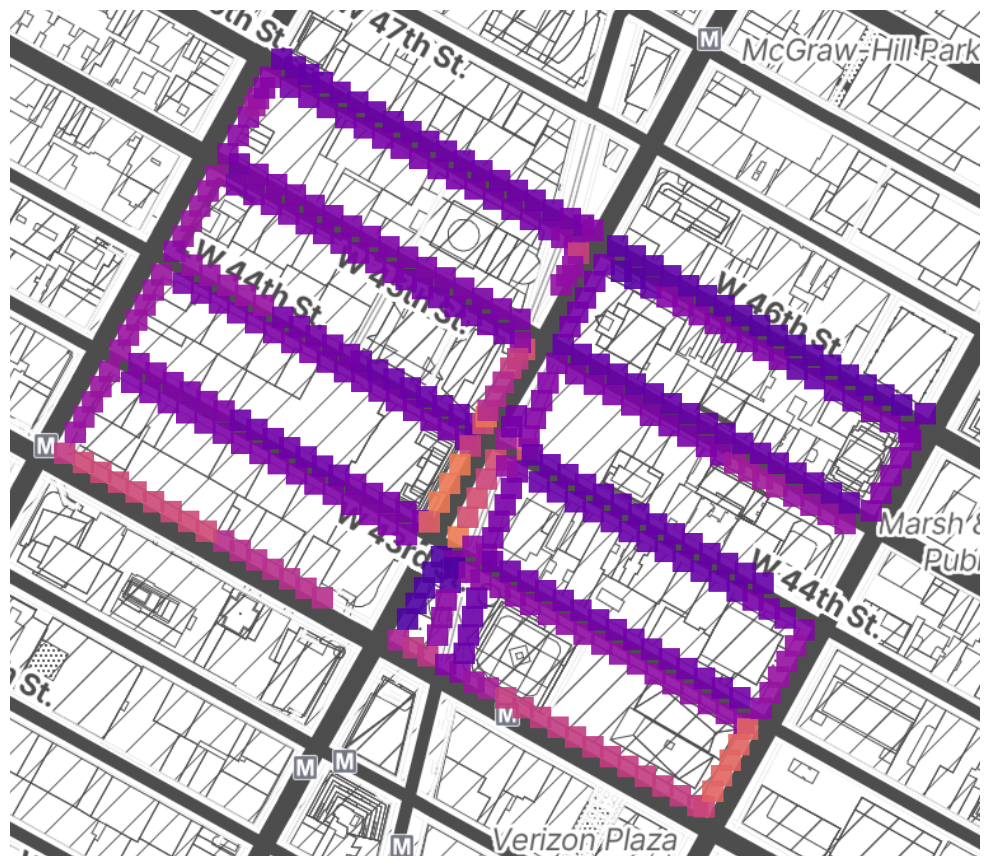

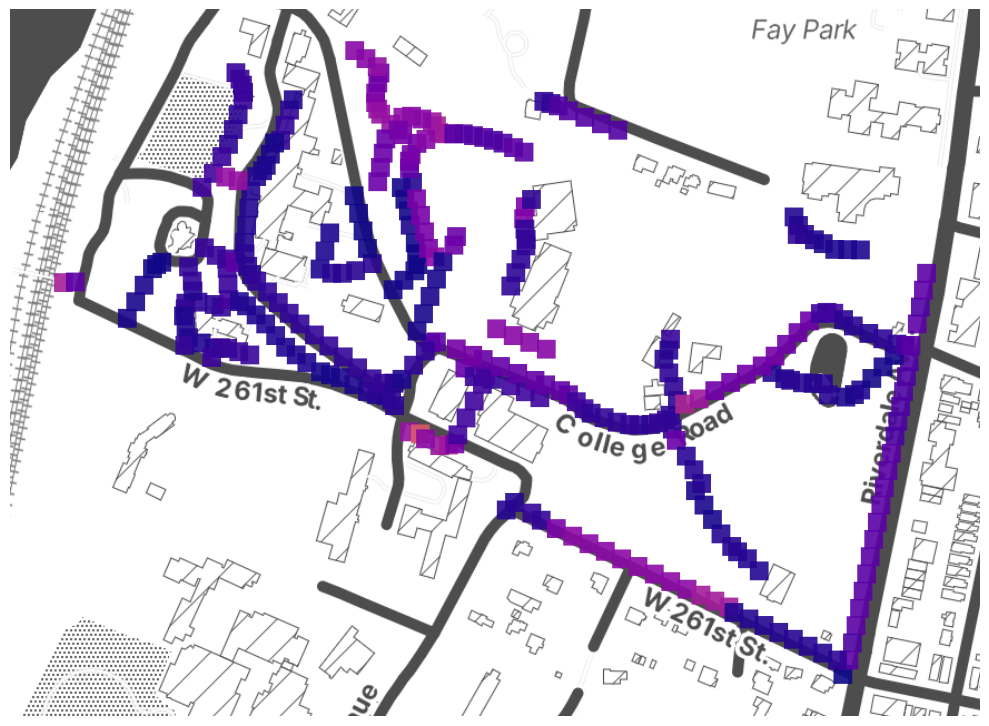

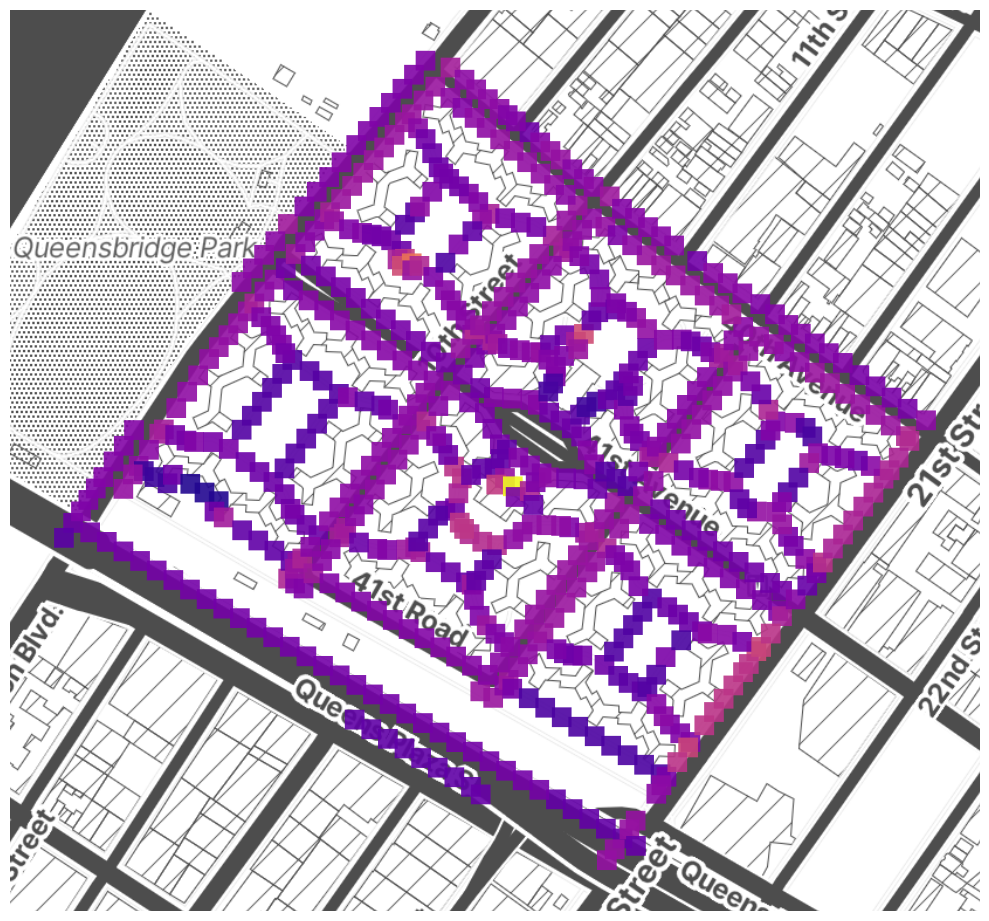

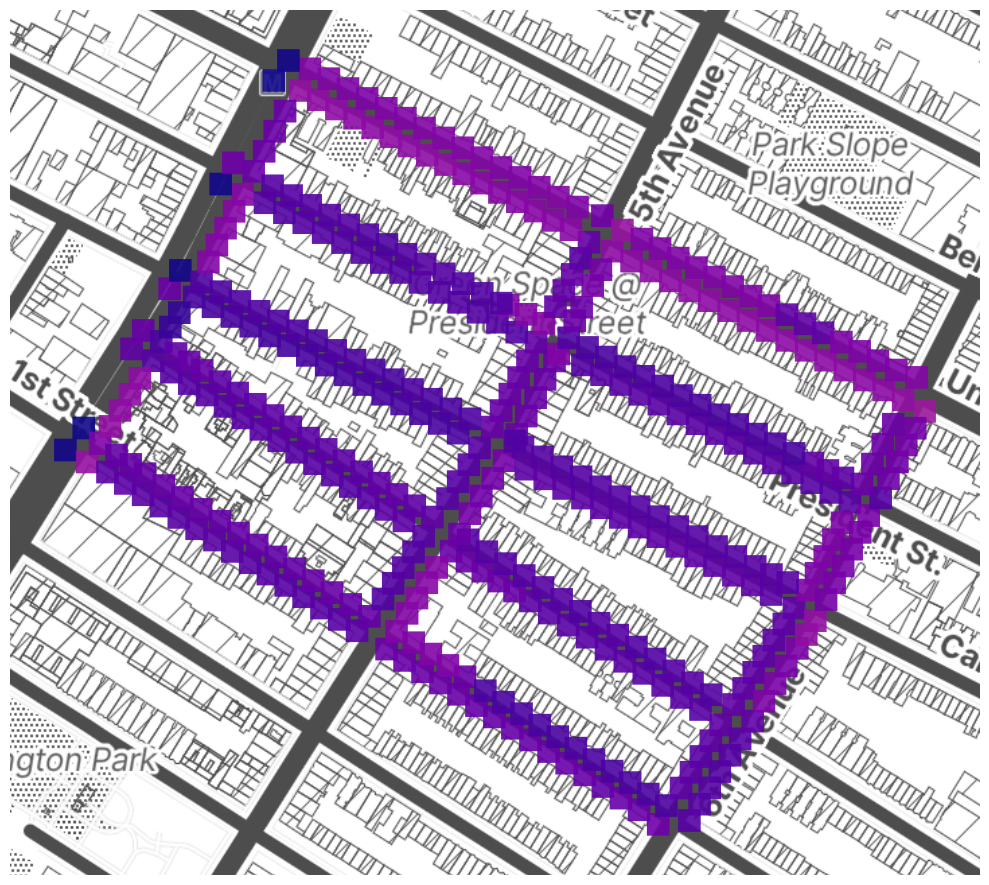

In [34]:
for tract_crop in tract_sidewalk_crops:
    tract_name = tract_crop['tract'].iloc[0]
    tract = ct_nyc.loc[tract_name].to_frame().T
    # convert series to GeoDataFrame
    tract = gpd.GeoDataFrame(tract, geometry=tract.geometry, crs=ct_nyc.crs)
    plot_sidewalks_space(tract_crop, tract, norm, name_col='BoroCT2020')
